# Árvores de Decisão

Neste ficheiro encontras-se o código relacionado com a implementação da árvore de decisão e os resultados dos seus testes

In [20]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

covid_data = pd.read_csv('google_new2.csv',sep=";")

## Limpeza de Dados

No caso de do Dataset fornecido pelo kaggle não existe nenhuma razão para fazer limpeza dado que o csv fornecido não tem valores em falta.

In [21]:
assert len(covid_data.loc[(covid_data['grocery_pharmacy'].isnull()) | 
               (covid_data['parks'].isnull()) | 
               (covid_data['residential'].isnull()) | 
               (covid_data['retail_recreation'].isnull()) |
               (covid_data['transit_stations'].isnull()) |
               (covid_data['workplaces'].isnull()) |
               (covid_data['total_cases'].isnull()) |
               (covid_data['fatalities'].isnull()) |
               (covid_data['iso'].isnull()) |
               (covid_data['country'].isnull()) |
               (covid_data['date'].isnull())]) == 0

## Análise de Dados

Nesta secção do código realizamos um breve análise dos dados fornecidos.

In [22]:
str_column =['iso','country']
target_column = ['total_cases','fatalities'] 
predictors = list(set(list(covid_data.columns))-set(target_column)-set(str_column))
covid_data[predictors] = covid_data[predictors]
covid_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
date,817.0,22.000000,12.417275,1.000,11.000,22.000,33.000,43.000
grocery_pharmacy,817.0,-8.229424,21.313369,-84.798,-16.578,0.088,4.838,59.474
parks,817.0,-13.394035,32.891636,-91.456,-32.841,-6.498,6.961,75.002
residential,817.0,9.545845,10.545377,-3.647,0.744,5.912,16.695,40.343
retail_recreation,817.0,-26.205257,30.992728,-95.158,-49.975,-14.427,-0.632,19.699
transit_stations,817.0,-28.370122,30.211025,-88.956,-54.145,-19.502,-0.970,16.822
workplaces,817.0,-19.126192,25.983021,-79.293,-40.582,-8.395,1.037,21.347
total_cases,817.0,10699.773562,31656.464952,0.000,27.000,648.000,4585.000,336912.000
fatalities,817.0,566.007344,2008.520488,0.000,0.000,6.000,79.000,15887.000


### Representação gráfica pt. 1

Desenhamos os gráficos de relação entre o número de pacientes e fatalidades relativamente a variações ,em várias localidades, nas visitas e as suas mudanças relativas a um valor de referência.

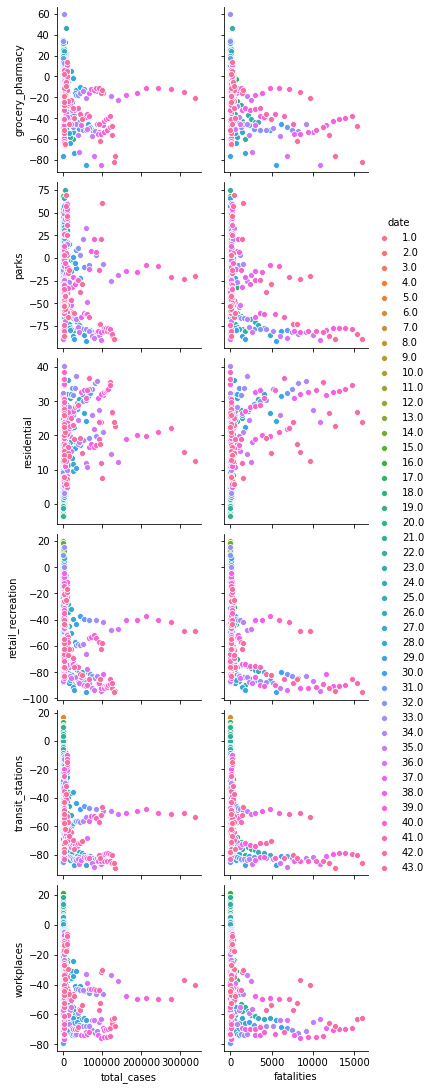

In [23]:
sb.pairplot(covid_data, hue="date",x_vars = ["total_cases","fatalities"], 
            y_vars = ["grocery_pharmacy","parks","residential",
                      "retail_recreation","transit_stations","workplaces"])

In [24]:
covid_data['country'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'Germany', 'Spain',
       'France', 'United Kingdom', 'Indonesia', 'India', 'Italy', 'Japan',
       'South Korea', 'Mexico', 'Saudi Arabia', 'Sweden', 'Turkey', 'US',
       'South Africa'], dtype=object)

In [25]:
assert len(covid_data['country'].unique()) == 19

### Agrupamento de Dados

Agrupamos os dados dos vários países por continente

In [26]:


EU_covid_data = covid_data.loc[((covid_data['country'] == 'Germany') 
                               | (covid_data['country'] == 'Spain')
                               | (covid_data['country'] == 'France')
                               | (covid_data['country'] == 'United Kingdom')
                               | (covid_data['country'] == 'Italy')
                               | (covid_data['country'] == 'Sweden'))]

AM_covid_data = covid_data.loc[((covid_data['country'] == 'Argentina')
                                | (covid_data['country'] == 'Canada')
                                | (covid_data['country'] == 'Mexico')
                                | (covid_data['country'] == 'US')
                                | (covid_data['country'] == 'Brazil'))]

AS_OC_covid_data = covid_data.loc[((covid_data['country'] == 'Indonesia')
                               | (covid_data['country'] == 'India')
                               | (covid_data['country'] == 'Japan')
                               | (covid_data['country'] == 'South Korea')
                               | (covid_data['country'] == 'Australia'))]

AF_covid_data = covid_data.loc[((covid_data['country'] == 'South Africa') 
                                | (covid_data['country'] == 'Saudi Arabia')
                                | (covid_data['country'] == 'Turkey'))]




In [27]:
AS_OC_covid_data['iso'].unique()

array(['AU', 'ID', 'IN', 'JP', 'KR'], dtype=object)

### Representação gráfica pt. 2

#### PairPlot

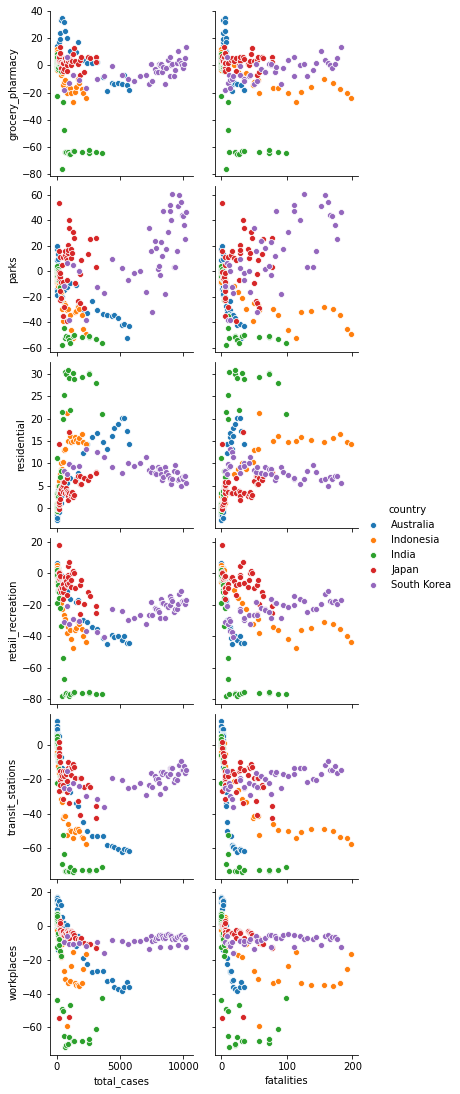

In [28]:
sb.pairplot(AS_OC_covid_data, hue="country", x_vars = ["total_cases","fatalities"], 
            y_vars = ["grocery_pharmacy","parks","residential",
                      "retail_recreation","transit_stations","workplaces"])

#### HeatMap

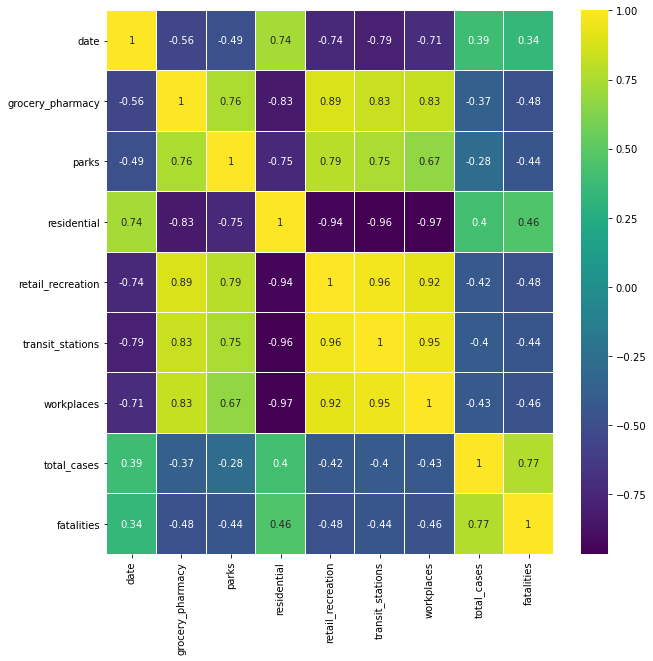

In [29]:
plt.figure(figsize=(10,10))
sb.heatmap(covid_data.corr(),cmap="viridis",
           annot=True,linewidth=0.1)

## Criação do Modelo

Nesta secção treinamos a nossa árvore de decisão.

### Divisão dos dados

Dividimos os dados fornecidos para os testes e para o treino

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import scale

print(predictors)
outputs = ['total_cases','fatalities']
X = AM_covid_data[predictors]

Y = AM_covid_data[outputs]


X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                      Y,
                                                      test_size = 0.2,
                                                      random_state = 465)

print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

['parks', 'date', 'retail_recreation', 'grocery_pharmacy', 'residential', 'transit_stations', 'workplaces']
Training Data Count: 172
Testing Data Count: 43


### Treino do modelo 

Nesta secção treinamos o modelo com os dados para treino.

In [31]:
from IPython.display import display

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,export_graphviz, plot_tree 
from sklearn.datasets import make_regression

##Generate a simple dataset
regr_1 = DecisionTreeRegressor(random_state=10, max_depth=15, min_samples_split=2) 
regr_1.fit(X_train, Y_train)



print(Y_test.head())
output1=regr_1.predict(X_test)

print(output1[0:5])
output2 = regr_1.predict(X_train)


     total_cases  fatalities
159         2777          25
96             4           0
772       308693        8403
2              0           0
574            7           0
[[2.07500e+03 2.40000e+01]
 [0.00000e+00 0.00000e+00]
 [3.36912e+05 9.61500e+03]
 [1.00000e+00 0.00000e+00]
 [3.40000e+01 2.00000e+00]]


### Score do treino

In [32]:
import sklearn.metrics as sm

print(sm.r2_score(Y_test,output1))
print(sm.r2_score(Y_train,output2))

0.8972662852509039
0.99999999998302


### Representação gráfica pt. 3

Nesta secção representamos os valores previstos da árvore de decisão para os vários valores de variação das localidades.

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


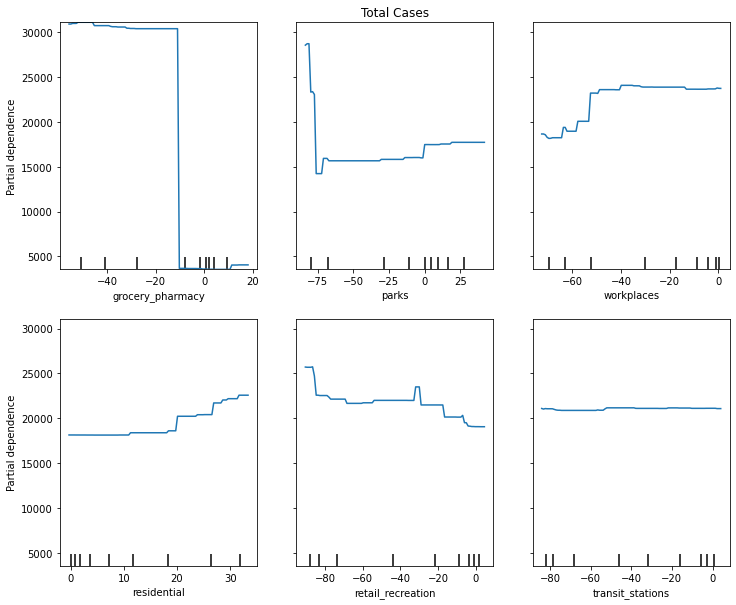

In [33]:
from sklearn.inspection import plot_partial_dependence

X = EU_covid_data[predictors]
Y = EU_covid_data['total_cases']

tree = DecisionTreeRegressor(random_state=10, max_depth=15, min_samples_split=2)

tree.fit(X, Y)

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title("Total Cases")
tree_disp = plot_partial_dependence(tree, X, ['grocery_pharmacy', 'parks', 'workplaces', 'residential', 'retail_recreation', 'transit_stations'], ax=ax)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


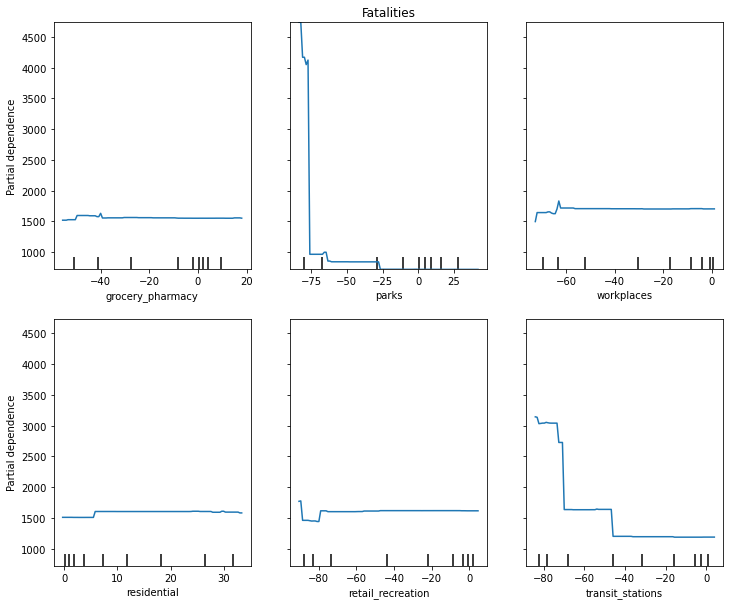

In [34]:
X = EU_covid_data[predictors]
Y = EU_covid_data['fatalities']

tree = DecisionTreeRegressor(random_state=10, max_depth=15, min_samples_split=2)

tree.fit(X, Y)

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title("Fatalities")
tree_disp = plot_partial_dependence(tree, X, ['grocery_pharmacy', 'parks', 'workplaces', 'residential', 'retail_recreation', 'transit_stations'], ax=ax)

In [35]:
regr_2 = DecisionTreeRegressor(random_state=10, max_depth=15, min_samples_split=2) 

test2_regr = ['date']

regr_2.fit(EU_covid_data[test2_regr], EU_covid_data['total_cases'])



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

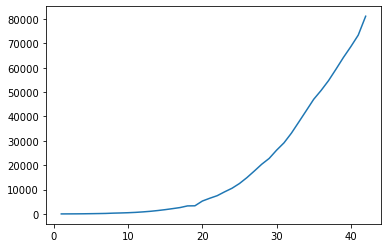

In [36]:
import numpy as np

b=np.arange(1,43)
a=np.arange(1,43)

for i in range(42):
    b[i]=regr_2.predict([[a[i]]])[0]
    
plt.plot(a,b)
    

    



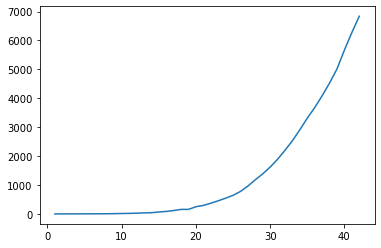

In [37]:
regr_2.fit(EU_covid_data[['date']], EU_covid_data['fatalities'])
b=np.arange(1,43)
a=np.arange(1,43)

for i in range(42):
    b[i]=regr_2.predict([[a[i]]])[0]
    
plt.plot(a,b)
    

## Criação e aplicação para o dataset da Google
Os erro são devidos ,principalmente, à quantidade reduzida dos dados de treino.

In [45]:
df = pd.read_csv('dados_limpos.csv',sep=',')

df = df.drop(['Unnamed: 0'],axis=1)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


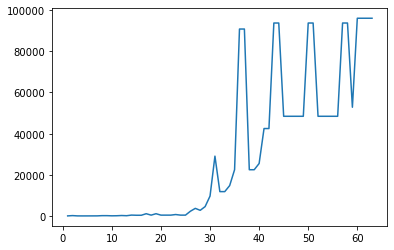

In [61]:
df_EU = df.loc[df['continent'] == 'EU']
Xg = df_EU[predictors]

X=EU_covid_data[predictors]
Y1=EU_covid_data["total_cases"]
Y2=EU_covid_data["fatalities"]


regr_1 = DecisionTreeRegressor(random_state=1000) 
regr_1.fit(X, Y1)

df_EU['total_cases'] = regr_1.predict(Xg)

regr_1.fit(X, Y2)

df_EU['fatalities'] = regr_1.predict(Xg)


plt.plot(df_EU['date'][0:63],df_EU['total_cases'][0:63])
#df_EU['fatalities']


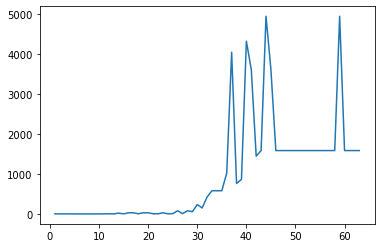

In [62]:
plt.plot(df_EU['date'][0:63],df_EU['fatalities'][0:63])